## DRO Orbits playground


In [7]:
#switches
debug_mode=0
#always turn off debug mode when deploying!




import pickle
import importlib
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import sys
import numpy as np
import datetime
import scipy.signal
import urllib
import json
import os   
import time
import h5py
import pytz
import copy
import cdflib
import sunpy
import pickle
from datetime import datetime
import seaborn as sns


from matplotlib.ticker import MultipleLocator

import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'browser'

import astropy.constants as const

import astropy.units as u
from heliocats import data as hd
from heliocats import plot as hp

##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    matplotlib.use('Agg') 
#mac
if sys.platform =='darwin':  
    print('system is mac')
    #for testing
    %matplotlib inline     
    #matplotlib.use('Agg') 

au=const.au.value*1e-3



from astropy import constants as const
from astropy import units as u
from scipy.integrate import solve_ivp

print('Au in km:',au) # in km

# Sun mass
M_sun = const.M_sun
# Earth mass
M_earth = const.M_earth


# Sun-Earth system parameters mu: mass parameter (m2/(m1+m2))
mu = M_earth/(M_sun+M_earth)  # Earth mass / (Sun + Earth mass)
print('mu is:',mu)


################################################ CHECK  ##############################################

#make sure to convert the current notebook to a script
os.system('jupyter nbconvert --to script positions_3d.ipynb')   


####################################################################################################################

#test execution times
clock_start = time.time()


system is mac
Au in km: 149597870.70000002
mu is: 3.003480327929619e-06


[NbConvertApp] Converting notebook positions_3d.ipynb to script
[NbConvertApp] Writing 22917 bytes to positions_3d.py


In [8]:
[psp, bepi, solo, sta, juice, earth, mercury, venus, mars, jupiter, saturn, uranus, neptune,l4,l5]=pickle.load( open( 'results/positions/positions_2020_all_HEEQ_1h_rad_cm.p', "rb" ) )   

start=mdates.date2num(datetime(2028,1,1))
end=mdates.date2num(datetime(2030,1,1))

#select the timerange
startind=np.argmin(abs(start-earth.time))
endind=np.argmin(abs(end-earth.time))
earth=earth[startind:endind]


startind=np.argmin(abs(start-venus.time))
endind=np.argmin(abs(end-venus.time))
venus=venus[startind:endind]


#coordinates in HEEQ
#dro HENON 1969
#St Cyr 2000

#convert to HEEQ

In [9]:
#Perozzi 2017






(0.0, 1.25)

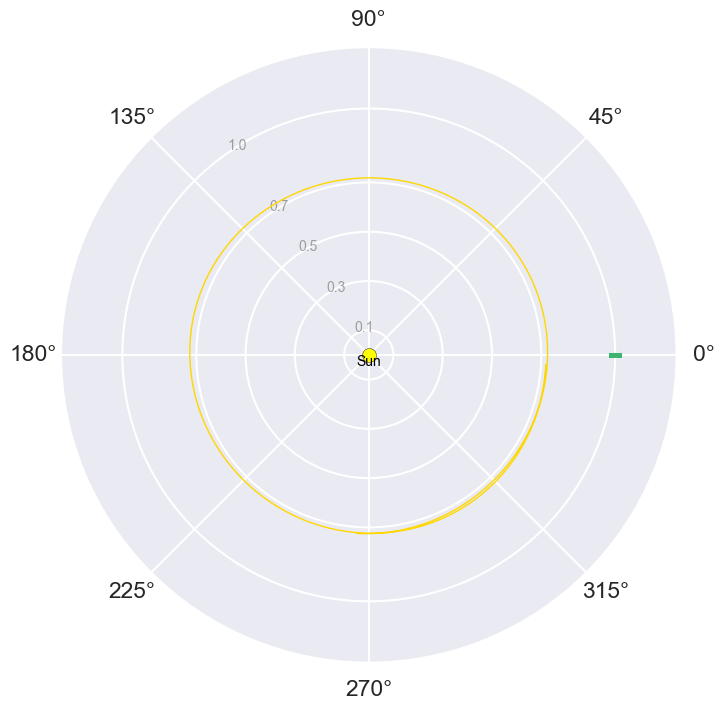

In [10]:

#plt.plot(earth.time,earth.r)

sns.set_style('darkgrid')
sns.set_context('talk')    
  
    
fig, ax = plt.subplots(1,figsize=(10, 8),subplot_kw={'projection': 'polar'},dpi=100)    
    
fsize=15
symsize_planet=10
#text thats always there on the plot
ax.text(0,0,'Sun', color='black', ha='center',fontsize=fsize-5,verticalalignment='top')
#ax.text(0,earth.r[earth_timeind]+0.12,'Earth', color='mediumseagreen', ha='center',fontsize=fsize-5,verticalalignment='center')


# Sun
ax.scatter(0,0,s=100,c='yellow',alpha=1, edgecolors='black', linewidth=0.3)
    

ax.scatter(earth.lon, earth.r, s=symsize_planet, c='mediumseagreen', alpha=1,lw=0,zorder=3)  
ax.plot(venus.lon, venus.r, c='gold', alpha=1,lw=1,zorder=3, marker=None)  

     
#set axes
ax.set_theta_zero_location('E')
#plt.rgrids((0.10,0.39,0.72,1.00,1.52),('0.10','0.39','0.72','1.0','1.52 AU'),angle=125, fontsize=fsize,alpha=0.9, color=backcolor)
plt.rgrids((0.1,0.3,0.5,0.7,1.0,1.3,1.6,2.0,2.5),('0.1','0.3','0.5','0.7','1.0','1.3','1.6 AU','2.0','2.5'),angle=125, fontsize=fsize-5,alpha=0.4)

ax.set_ylim(0, 1.25) 
    
    

### Tests with CR3BP (circular restricted 3 Body Problem)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Physical constants
G = 6.67430e-20  # Gravitational constant in km^3/(kg*s^2)
M_sun = 1.989e30  # kg
M_earth = 5.972e24  # kg
R = 1.496e8  # Earth-Sun distance in km

# Calculate system parameters
M_total = M_sun + M_earth
mu = M_earth / M_total  # Mass parameter
omega = np.sqrt(G * M_total / R**3)  # Angular velocity of rotating frame (rad/s)

print(f"System Parameters:")
print(f"  Mass parameter μ = {mu:.6e}")
print(f"  Earth-Sun distance R = {R:.6e} km")
print(f"  Angular velocity ω = {omega:.6e} rad/s")
print(f"  Orbital period = {2*np.pi/omega/86400:.2f} days\n")

def cr3bp_equations(t, state):
    """
    Equations of motion for the Circular Restricted 3-Body Problem
    in the rotating reference frame with physical units.
    
    state = [x, y, vx, vy] in km and km/s
    """
    x, y, vx, vy = state
    
    # Positions of the primaries in rotating frame
    x1 = -mu * R  # Sun position
    x2 = (1 - mu) * R  # Earth position
    
    # Distances to the two primaries
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    
    # Prevent singularities
    #r1 = max(r1, 1.0)
    #r2 = max(r2, 1.0)
    
    # Gravitational accelerations
    ax = (2*omega*vy + omega**2*x - G*M_sun*(x - x1)/r1**3 - G*M_earth*(x - x2)/r2**3)
    
    ay = (-2*omega*vx + omega**2*y - G*M_sun*y/r1**3 - G*M_earth*y/r2**3)
    
    return [vx, vy, ax, ay]

System Parameters:
  Mass parameter μ = 3.002505e-06
  Earth-Sun distance R = 1.496000e+08 km
  Angular velocity ω = 1.991240e-07 rad/s
  Orbital period = 365.21 days



Integrating trajectory...


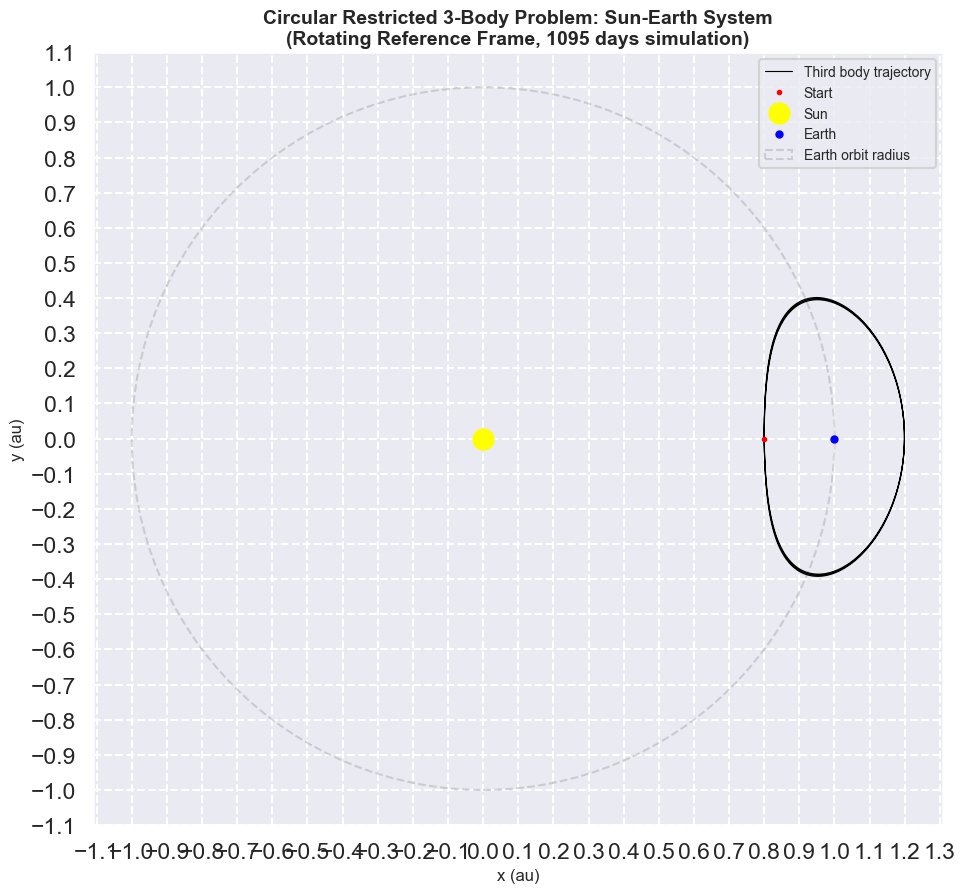


Simulation Results:
  Simulation time: 1095 days
  Number of points: 10000

Initial conditions:
  Position: (1.197e+08, 0.000e+00) km
  Velocity: (0.00, 12.65) km/s
  Speed: 12.65 km/s

Primary positions (rotating frame):
  Sun:   x = -0.000 million km
  Earth: x = 1.000 million km


In [12]:
# Initial conditions for the third body (e.g., spacecraft or asteroid)
# Starting near Earth's orbit

#first solution
#x0 = 0.99*au  # km (between Sun and Earth)
#y0 = 0  # km
#vx0 = 0  # km/s
#vy0 = 1 # km/s

#x0 = 0.95*au  # km (between Sun and Earth)
#y0 = 0  # km
#vx0 = 0  # km/s
#vy0 = 3 # km/s



###################### find dro solutions

########### solution for 0.9 au is 6.13 km/s
#x0 = 0.90*au  # km (between Sun and Earth)
#y0 = 0  # km
#vx0 = 0  # km/s
#vy0 = 6.13 # km/s


########### solution for 0.85 au is 9.33 km/s
#x0 = 0.85*au  # km (between Sun and Earth)
#y0 = 0  # km
#vx0 = 0  # km/s
#vy0 = 9.33 # km/s


########### solution for 0.8 au is 9.33 km/s
x0 = 0.8*au  # km (between Sun and Earth)
y0 = 0  # km
vx0 = 0  # km/s
vy0 = 12.65 # km/s



initial_state = [x0, y0, vx0, vy0]

# Time span for integration (in seconds)
years=3
days = 365*years  # Simulate for 1 year
t_span = (0, days * 86400)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

print("Integrating trajectory...")
# Solve the differential equations
solution = solve_ivp(cr3bp_equations, t_span, initial_state,  t_eval=t_eval, method='DOP853', rtol=1e-10, atol=1e-8)


# Extract trajectory, convert to au
x = solution.y[0]/au
y = solution.y[1]/au




###########################################################

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

#third body
ax.plot(x, y, 'black', linewidth=0.8, alpha=1.0, label='Third body trajectory')
ax.plot(x0/au, y0/au, 'o', color='red', markersize=3, label='Start', zorder=4)

# Plot Sun - fixed at origin shifted by -mu*R
sun_x = -mu * R / au
ax.plot(sun_x, 0, 'o', color='yellow', markersize=15, label='Sun', zorder=5)
# Plot Earth - fixed at (1-mu)*R
earth_x = (1 - mu) * R / au
ax.plot(earth_x, 0, 'o', color='blue', markersize=5, label='Earth', zorder=5)


# Add distance circles for reference
circle = plt.Circle((sun_x, 0), R/au, fill=False, color='gray', 
                    linestyle='--', alpha=0.3, label='Earth orbit radius')
ax.add_patch(circle)
# Formatting
ax.set_xlabel('x (au)', fontsize=12)
ax.set_ylabel('y (au)', fontsize=12)
ax.set_title(f'Circular Restricted 3-Body Problem: Sun-Earth System\n(Rotating Reference Frame, {days} days simulation)', fontsize=14, fontweight='bold')

ax.legend(loc='upper right', fontsize=10)


ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))


ax.grid(True, alpha=1.0, linestyle='--')
ax.set_aspect('equal')



plt.tight_layout()

plt.savefig('results/dro/dro_test_08au.png', dpi=300,bbox_inches='tight')
plt.show()

# Print trajectory statistics
print(f"\nSimulation Results:")
print(f"  Simulation time: {days} days")
print(f"  Number of points: {len(x)}")
print(f"\nInitial conditions:")
print(f"  Position: ({x0:.3e}, {y0:.3e}) km")
print(f"  Velocity: ({vx0:.2f}, {vy0:.2f}) km/s")
print(f"  Speed: {np.sqrt(vx0**2 + vy0**2):.2f} km/s")
print(f"\nPrimary positions (rotating frame):")
print(f"  Sun:   x = {sun_x:.3f} million km")
print(f"  Earth: x = {earth_x:.3f} million km")


